In [1]:
#import libraries
import pandas as pd
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
#reading with csv was not able to identify date properly as seen below. Only the last 2 digits were identified. This did nit make age computation possible
ptcsv=pd.read_csv("patients.csv")

In [4]:
ptcsv.head(2)

,Id,BIRTHDATE,DEATHDATE,PREFIX,SUFFIX,MARITAL,RACE,ETHNICITY,GENDER,BIRTHPLACE,CITY,STATE,COUNTY,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE
0,f1639046-ecb1-b409-21d3-85a7e8e23c81,8/31/57,NaN,Ms.,NaN,S,white,nonhispanic,F,Germantown Maryland US,Baltimore,Maryland,Baltimore city,59484.51,1455.08
1,f851859f-b0fe-8b36-9939-4276b96d302d,11/22/50,NaN,Mrs.,NaN,M,black,nonhispanic,F,Clarksburg Maryland US,Baltimore,Maryland,Baltimore city,239428.05,12764.06


In [5]:
# csv was converted to excel and read with pandas which made it possible to read all the digits in the dates.
pt=pd.read_excel("patients.xlsx")

In [7]:
# as seen below birthdate is shown fully to make it easy to calculate age
pt.head(2)

,Id,BIRTHDATE,DEATHDATE,PREFIX,SUFFIX,MARITAL,RACE,ETHNICITY,GENDER,BIRTHPLACE,CITY,STATE,COUNTY,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE
0,f1639046-ecb1-b409-21d3-85a7e8e23c81,1957-08-31,NaT,Ms.,NaN,S,white,nonhispanic,F,Germantown Maryland US,Baltimore,Maryland,Baltimore city,59484.51,1455.08
1,f851859f-b0fe-8b36-9939-4276b96d302d,1950-11-22,NaT,Mrs.,NaN,M,black,nonhispanic,F,Clarksburg Maryland US,Baltimore,Maryland,Baltimore city,239428.05,12764.06


In [8]:
pt.describe()

,BIRTHDATE,DEATHDATE,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE
count,53068,28068,5.306800e+04,53068.000000
mean,1972-04-25 13:32:33.448405824,2002-11-21 20:03:41.633176576,1.269905e+06,24457.411116
min,1930-01-01 00:00:00,1930-01-31 00:00:00,9.318400e+02,0.000000
25%,1938-09-02 00:00:00,1994-01-17 18:00:00,1.259115e+06,5142.975000
50%,1953-10-22 00:00:00,2007-12-14 00:00:00,1.447207e+06,8666.905000
75%,2023-06-30 00:00:00,2017-05-16 00:00:00,1.575694e+06,14675.935000
max,2029-12-31 00:00:00,2029-12-15 00:00:00,2.354718e+06,643931.210000
std,NaN,NaN,5.075817e+05,58723.398224


In [9]:
pt.describe(include=['object'])

,Id,PREFIX,SUFFIX,MARITAL,RACE,ETHNICITY,GENDER,BIRTHPLACE,CITY,STATE,COUNTY
count,53068,52172,1744,51699,53068,53068,53068,53068,53068,53068,53068
unique,53068,3,3,2,5,2,2,563,448,1,24
top,f1639046-ecb1-b409-21d3-85a7e8e23c81,Mr.,MD,M,white,nonhispanic,M,Baltimore Maryland US,Baltimore,Maryland,Montgomery County
freq,1,29543,617,41414,30294,47402,30124,6049,6764,53068,10305


In [10]:
pt.isnull().sum()

Id                         0
BIRTHDATE                  0
DEATHDATE              25000
PREFIX                   896
SUFFIX                 51324
MARITAL                 1369
RACE                       0
ETHNICITY                  0
GENDER                     0
BIRTHPLACE                 0
CITY                       0
STATE                      0
COUNTY                     0
HEALTHCARE_EXPENSES        0
HEALTHCARE_COVERAGE        0
dtype: int64

In [12]:
pt.nunique()

Id                     53068
BIRTHDATE              12907
DEATHDATE              13442
PREFIX                     3
SUFFIX                     3
MARITAL                    2
RACE                       5
ETHNICITY                  2
GENDER                     2
BIRTHPLACE               563
CITY                     448
STATE                      1
COUNTY                    24
HEALTHCARE_EXPENSES    53047
HEALTHCARE_COVERAGE    47785
dtype: int64

In [13]:
pt.dtypes

Id                             object
BIRTHDATE              datetime64[ns]
DEATHDATE              datetime64[ns]
PREFIX                         object
SUFFIX                         object
MARITAL                        object
RACE                           object
ETHNICITY                      object
GENDER                         object
BIRTHPLACE                     object
CITY                           object
STATE                          object
COUNTY                         object
HEALTHCARE_EXPENSES           float64
HEALTHCARE_COVERAGE           float64
dtype: object

In [16]:
pt.duplicated().sum()

0

In [17]:
pt.shape

(53068, 16)

In [18]:
import datetime
pt['AGE'] = (datetime.datetime.now() - pt['BIRTHDATE']).dt.days // 365
pt.head(2)

,Id,BIRTHDATE,DEATHDATE,PREFIX,SUFFIX,MARITAL,RACE,ETHNICITY,GENDER,BIRTHPLACE,CITY,STATE,COUNTY,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE,AGE
0,f1639046-ecb1-b409-21d3-85a7e8e23c81,1957-08-31,NaT,Ms.,NaN,S,white,nonhispanic,F,Germantown Maryland US,Baltimore,Maryland,Baltimore city,59484.51,1455.08,66
1,f851859f-b0fe-8b36-9939-4276b96d302d,1950-11-22,NaT,Mrs.,NaN,M,black,nonhispanic,F,Clarksburg Maryland US,Baltimore,Maryland,Baltimore city,239428.05,12764.06,73


In [19]:
# Filter patients older than 65. The concept of "elderly" is often defined as individuals aged 65 and over. (Singh & Bajorek, 2014).
elderly=pt[pt['AGE'] >=65]
elderly.head(2)

,Id,BIRTHDATE,DEATHDATE,PREFIX,SUFFIX,MARITAL,RACE,ETHNICITY,GENDER,BIRTHPLACE,CITY,STATE,COUNTY,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE,AGE
0,f1639046-ecb1-b409-21d3-85a7e8e23c81,1957-08-31,NaT,Ms.,NaN,S,white,nonhispanic,F,Germantown Maryland US,Baltimore,Maryland,Baltimore city,59484.51,1455.08,66
1,f851859f-b0fe-8b36-9939-4276b96d302d,1950-11-22,NaT,Mrs.,NaN,M,black,nonhispanic,F,Clarksburg Maryland US,Baltimore,Maryland,Baltimore city,239428.05,12764.06,73


In [20]:
elderly.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30461 entries, 0 to 53057
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Id                   30461 non-null  object        
 1   BIRTHDATE            30461 non-null  datetime64[ns]
 2   DEATHDATE            13890 non-null  datetime64[ns]
 3   PREFIX               29949 non-null  object        
 4   SUFFIX               1017 non-null   object        
 5   MARITAL              29676 non-null  object        
 6   RACE                 30461 non-null  object        
 7   ETHNICITY            30461 non-null  object        
 8   GENDER               30461 non-null  object        
 9   BIRTHPLACE           30461 non-null  object        
 10  CITY                 30461 non-null  object        
 11  STATE                30461 non-null  object        
 12  COUNTY               30461 non-null  object        
 13  HEALTHCARE_EXPENSES  30461 non-null 

In [21]:
elderly.nunique()

Id                     30461
BIRTHDATE               8402
DEATHDATE               8034
PREFIX                     3
SUFFIX                     3
MARITAL                    2
RACE                       5
ETHNICITY                  2
GENDER                     2
BIRTHPLACE               536
CITY                     425
STATE                      1
COUNTY                    24
HEALTHCARE_EXPENSES    30451
HEALTHCARE_COVERAGE    28098
AGE                       30
dtype: int64

In [22]:
elderly.shape

(30461, 16)

In [23]:
#import libraries
import pyspark
import pyspark.mllib.stat as st
import pyspark.ml.feature as ft
import pyspark.sql.types as typ
import pyspark.ml.classification as cl
import pyspark.ml.tuning as tune
from pyspark.sql import functions as F

from pyspark.ml import Pipeline

import numpy as np
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
from pyspark.sql.functions import sum, avg

import numpy as np
import matplotlib.pyplot as plt

In [24]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()
sc = spark.sparkContext

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/04/24 09:18:12 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [25]:
sc

<SparkContext master=local[*] appName=pyspark-shell>

In [26]:
# convert elderly,patients 65 and older to spark dataframe
ptpy = spark.createDataFrame(elderly)

In [27]:
ptpy.show(2)

+--------------------+-------------------+---------+------+------+-------+-----+-----------+------+--------------------+---------+--------+--------------+-------------------+-------------------+---+
|                  Id|          BIRTHDATE|DEATHDATE|PREFIX|SUFFIX|MARITAL| RACE|  ETHNICITY|GENDER|          BIRTHPLACE|     CITY|   STATE|        COUNTY|HEALTHCARE_EXPENSES|HEALTHCARE_COVERAGE|AGE|
+--------------------+-------------------+---------+------+------+-------+-----+-----------+------+--------------------+---------+--------+--------------+-------------------+-------------------+---+
|f1639046-ecb1-b40...|1957-08-31 00:00:00|     null|   Ms.|   NaN|      S|white|nonhispanic|     F|Germantown  Maryl...|Baltimore|Maryland|Baltimore city|           59484.51|            1455.08| 66|
|f851859f-b0fe-8b3...|1950-11-22 00:00:00|     null|  Mrs.|   NaN|      M|black|nonhispanic|     F|Clarksburg  Maryl...|Baltimore|Maryland|Baltimore city|          239428.05|           12764.06| 73|
+----

In [29]:
ptpynum_rows = ptpy.count()
ptpynum_rows

30461

In [30]:
# Print the schema of the PySpark DataFrame 'ptpy'
ptpy.printSchema()


root
 |-- Id: string (nullable = true)
 |-- BIRTHDATE: timestamp (nullable = true)
 |-- DEATHDATE: timestamp (nullable = true)
 |-- PREFIX: string (nullable = true)
 |-- SUFFIX: string (nullable = true)
 |-- MARITAL: string (nullable = true)
 |-- RACE: string (nullable = true)
 |-- ETHNICITY: string (nullable = true)
 |-- GENDER: string (nullable = true)
 |-- BIRTHPLACE: string (nullable = true)
 |-- CITY: string (nullable = true)
 |-- STATE: string (nullable = true)
 |-- COUNTY: string (nullable = true)
 |-- HEALTHCARE_EXPENSES: double (nullable = true)
 |-- HEALTHCARE_COVERAGE: double (nullable = true)
 |-- AGE: long (nullable = true)



In [31]:
cdpy=spark.read.csv("conditions.csv",header=True, inferSchema=True)

In [32]:
cdpy.show(2)

+----------+----+--------------------+--------------------+---------+--------------------+
|     START|STOP|             PATIENT|           ENCOUNTER|     CODE|         DESCRIPTION|
+----------+----+--------------------+--------------------+---------+--------------------+
|1973-12-22|null|f1639046-ecb1-b40...|47a338d3-4e76-fdf...| 19169002|Miscarriage in fi...|
|1992-12-02|null|f851859f-b0fe-8b3...|ed3e50dd-ebdf-eae...|162864005|Body mass index 3...|
+----------+----+--------------------+--------------------+---------+--------------------+
only showing top 2 rows



In [33]:
cdpy.printSchema()

root
 |-- START: date (nullable = true)
 |-- STOP: date (nullable = true)
 |-- PATIENT: string (nullable = true)
 |-- ENCOUNTER: string (nullable = true)
 |-- CODE: long (nullable = true)
 |-- DESCRIPTION: string (nullable = true)



In [34]:
cdpynum_rows = cdpy.count()
cdpynum_rows

781304

In [35]:
cdpy.columns

['START', 'STOP', 'PATIENT', 'ENCOUNTER', 'CODE', 'DESCRIPTION']

In [36]:
cdpy.columns

['START', 'STOP', 'PATIENT', 'ENCOUNTER', 'CODE', 'DESCRIPTION']

In [37]:
# join conditions and patient tables, with only patients above 65 years old
joined_df = ptpy.join(cdpy, ptpy['id'] == cdpy['PATIENT'], 'inner')

In [38]:
joined_df.take(2)

[Row(Id='93c24b3d-a235-7fac-b87b-56baf8d1a7ff', BIRTHDATE=datetime.datetime(1934, 5, 31, 0, 0), DEATHDATE=datetime.datetime(1975, 6, 5, 0, 0), PREFIX='Mr.', SUFFIX='NaN', MARITAL='M', RACE='white', ETHNICITY='hispanic', GENDER='M', BIRTHPLACE='Lima  Lima Province  PE', CITY='Annapolis', STATE='Maryland', COUNTY='Anne Arundel County', HEALTHCARE_EXPENSES=1038772.91, HEALTHCARE_COVERAGE=2787.3, AGE=89, START=datetime.date(1956, 8, 2), STOP=None, PATIENT='93c24b3d-a235-7fac-b87b-56baf8d1a7ff', ENCOUNTER='0f4c7c06-d42e-8d6f-0090-fa4325d093a4', CODE=87433001, DESCRIPTION='Pulmonary emphysema (disorder)'),
 Row(Id='93c24b3d-a235-7fac-b87b-56baf8d1a7ff', BIRTHDATE=datetime.datetime(1934, 5, 31, 0, 0), DEATHDATE=datetime.datetime(1975, 6, 5, 0, 0), PREFIX='Mr.', SUFFIX='NaN', MARITAL='M', RACE='white', ETHNICITY='hispanic', GENDER='M', BIRTHPLACE='Lima  Lima Province  PE', CITY='Annapolis', STATE='Maryland', COUNTY='Anne Arundel County', HEALTHCARE_EXPENSES=1038772.91, HEALTHCARE_COVERAGE=2787

In [39]:
#count rows
joined_dfnum_rows = joined_df.count()
joined_dfnum_rows

456571

In [40]:
# Find the count of distinct patients IN JOINED DATA
distinct_patients_countid = joined_df.select("Id").distinct().count()

# Display the count of distinct patients
print("Count of distinct patients:", distinct_patients_countid)

Count of distinct patients: 30460


In [41]:
description_counts = joined_df.groupBy("DESCRIPTION").count().orderBy(F.desc("count"))
description_counts.take(5)

[Row(DESCRIPTION='Viral sinusitis (disorder)', count=34356),
 Row(DESCRIPTION='Acute viral pharyngitis (disorder)', count=18656),
 Row(DESCRIPTION='Body mass index 30+ - obesity (finding)', count=18107),
 Row(DESCRIPTION='Suspected COVID-19', count=17464),
 Row(DESCRIPTION='COVID-19', count=17091)]

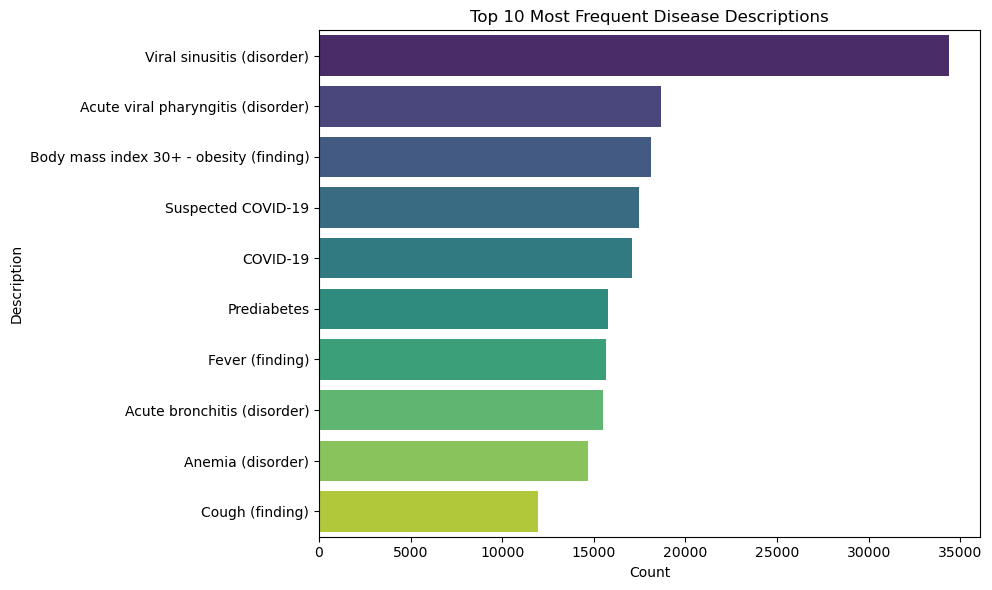

In [42]:


# Convert to Pandas DataFrame for plotting
description_counts_pd = description_counts.limit(10).toPandas()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='DESCRIPTION', data=description_counts_pd, palette='viridis')
plt.xlabel('Count')
plt.ylabel('Description')
plt.title('Top 10 Most Frequent Disease Descriptions')
plt.tight_layout()

# Save the plot as a JPEG
plt.savefig('top_disease_descriptions.jpeg')

# Show plot
plt.show()


In [43]:
# Filter the DataFrame to include only the top 3 most prevalent diseases
filtered_top3 = joined_df.filter(joined_df['DESCRIPTION'].isin(['Viral sinusitis (disorder)', 'Acute viral pharyngitis (disorder)', 'Body mass index 30+ - obesity (finding)']))

# Group by 'COUNTY' and count occurrences of each disease
county_counts = filtered_top3.groupBy('COUNTY', 'DESCRIPTION').agg(F.count('*').alias('count')).orderBy('count', ascending=False)

# Select the top 5 counties
top_5_counties = county_counts.groupBy('COUNTY').agg(F.sum('count').alias('total_count of 3 diseases')).orderBy('total_count of 3 diseases', ascending=False).limit(5)

# Show the top 5 counties
top_5_counties.show()

+--------------------+-------------------------+
|              COUNTY|total_count of 3 diseases|
+--------------------+-------------------------+
|   Montgomery County|                    13803|
|Prince George's C...|                    12613|
|    Baltimore County|                    10214|
|      Baltimore city|                     9038|
| Anne Arundel County|                     7452|
+--------------------+-------------------------+



In [44]:

# Group by 'CITY' and count occurrences of each disease
city_counts = filtered_top3.groupBy('CITY', 'DESCRIPTION').agg(F.count('*').alias('count')).orderBy('count', ascending=False)

# Select the top 5 cities
top_5_cities = city_counts.groupBy('CITY').agg(F.sum('count').alias('total_count of 3 diseases')).orderBy('total_count of 3 diseases', ascending=False).limit(5)

# Show the top 5 cities
top_5_cities.show()

+-------------+-------------------------+
|         CITY|total_count of 3 diseases|
+-------------+-------------------------+
|    Baltimore|                     9038|
|     Columbia|                     1358|
|   Germantown|                     1349|
|Ellicott City|                     1190|
| Gaithersburg|                     1183|
+-------------+-------------------------+



In [45]:
joined_df.schema

StructType([StructField('Id', StringType(), True), StructField('BIRTHDATE', TimestampType(), True), StructField('DEATHDATE', TimestampType(), True), StructField('PREFIX', StringType(), True), StructField('SUFFIX', StringType(), True), StructField('MARITAL', StringType(), True), StructField('RACE', StringType(), True), StructField('ETHNICITY', StringType(), True), StructField('GENDER', StringType(), True), StructField('BIRTHPLACE', StringType(), True), StructField('CITY', StringType(), True), StructField('STATE', StringType(), True), StructField('COUNTY', StringType(), True), StructField('HEALTHCARE_EXPENSES', DoubleType(), True), StructField('HEALTHCARE_COVERAGE', DoubleType(), True), StructField('AGE', LongType(), True), StructField('START', DateType(), True), StructField('STOP', DateType(), True), StructField('PATIENT', StringType(), True), StructField('ENCOUNTER', StringType(), True), StructField('CODE', LongType(), True), StructField('DESCRIPTION', StringType(), True)])

In [46]:
#on average insurance covered healthcare was less than  healthcare expenses by patients
des=joined_df.describe('HEALTHCARE_EXPENSES', 'HEALTHCARE_COVERAGE')
des.show()

+-------+-------------------+-------------------+
|summary|HEALTHCARE_EXPENSES|HEALTHCARE_COVERAGE|
+-------+-------------------+-------------------+
|  count|             456571|             456571|
|   mean|  1301354.172672894| 22028.092033989058|
| stddev| 497529.90456010535| 48056.706502718225|
|    min|            1009.79|                0.0|
|    max|         2282130.81|          643931.21|
+-------+-------------------+-------------------+



In [47]:
# Compute the avg of HEALTHCARE_EXPENSES and HEALTHCARE_COVERAGE columns
avg_result = joined_df.select(F.avg("HEALTHCARE_EXPENSES"), F.avg("HEALTHCARE_COVERAGE"))
avg_result.show(truncate=False)

+------------------------+------------------------+
|avg(HEALTHCARE_EXPENSES)|avg(HEALTHCARE_COVERAGE)|
+------------------------+------------------------+
|1301354.172672894       |22028.092033989058      |
+------------------------+------------------------+



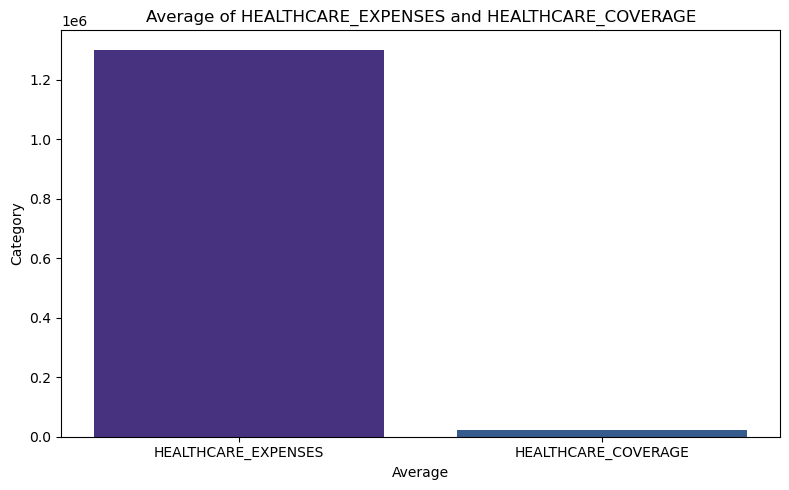

In [48]:
avg_result = joined_df.select(F.avg("HEALTHCARE_EXPENSES"), F.avg("HEALTHCARE_COVERAGE")).collect()

# Extract the average values
healthcare_expenses_avg = avg_result[0][0]
healthcare_coverage_avg = avg_result[0][1]

# Categories
categories = ["HEALTHCARE_EXPENSES", "HEALTHCARE_COVERAGE"]
avg_values = [healthcare_expenses_avg, healthcare_coverage_avg]

# Plotting
plt.figure(figsize=(8, 5))
plt.bar(categories, avg_values, color=sns.color_palette("viridis"))
plt.xlabel('Average')
plt.ylabel('Category')
plt.title('Average of HEALTHCARE_EXPENSES and HEALTHCARE_COVERAGE')
plt.tight_layout()

# Show plot
plt.show()


In [49]:
#sum of HEALTHCARE_EXPENSES and HEALTHCARE_COVERAGE columns
sum_result = joined_df.select(F.sum("HEALTHCARE_EXPENSES"), F.sum("HEALTHCARE_COVERAGE"))
sum_result.show(truncate=False)

+------------------------+------------------------+
|sum(HEALTHCARE_EXPENSES)|sum(HEALTHCARE_COVERAGE)|
+------------------------+------------------------+
|5.941605759714359E11    |1.0057388008050419E10   |
+------------------------+------------------------+



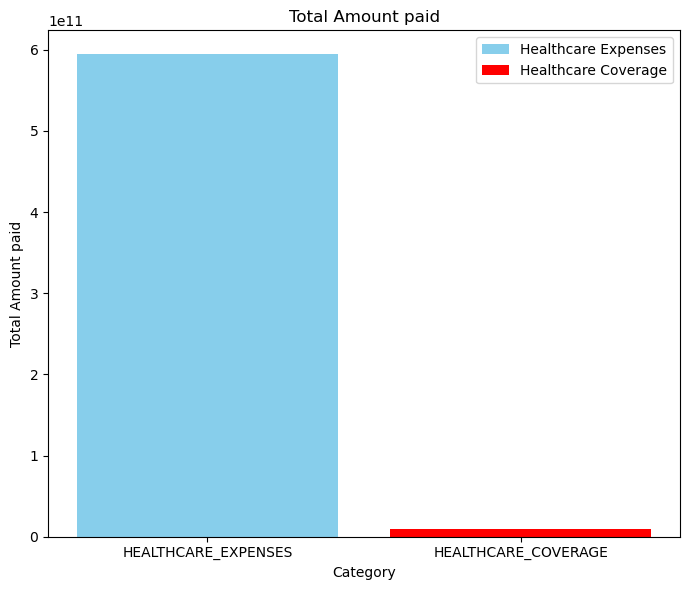

In [50]:
sum_result = joined_df.select(F.sum("HEALTHCARE_EXPENSES"), F.sum("HEALTHCARE_COVERAGE")).collect()

# Extract the sum values
healthcare_expenses_sum = sum_result[0][0]
healthcare_coverage_sum = sum_result[0][1]

# Categories
categories = ["HEALTHCARE_EXPENSES", "HEALTHCARE_COVERAGE"]
sum_values = [healthcare_expenses_sum, healthcare_coverage_sum]

plt.figure(figsize=(7, 6))
bar_width = 0.5
bar_positions = [0, 0.6]
bars = plt.bar(bar_positions, sum_values, color=['skyblue', 'red'], width=bar_width)


plt.xticks(bar_positions, categories)

plt.xlabel('Category')
plt.ylabel('Total Amount paid')
plt.title('Total Amount paid')

#legend
plt.legend(bars, ['Healthcare Expenses', 'Healthcare Coverage'])

plt.tight_layout()

plt.savefig("HEALTHCARE_EXPENSES_VS_HEALTHCARE_COVERAGE.jpeg")

# Show plot
plt.show()


In [55]:
#finding conditions with most healthcare expenses
healthcare_expenses = joined_df.groupBy( "DESCRIPTION").agg({"HEALTHCARE_EXPENSES": "sum"}).sort(F.col("sum(HEALTHCARE_EXPENSES)").desc())

In [56]:
healthcare_expenses.show()

+--------------------+------------------------+
|         DESCRIPTION|sum(HEALTHCARE_EXPENSES)|
+--------------------+------------------------+
|Viral sinusitis (...|    4.392991194216998E10|
|Acute viral phary...|    2.386289128792002...|
|Body mass index 3...|       2.352717902633E10|
|  Suspected COVID-19|       2.330248307579E10|
|            COVID-19|        2.28045508682E10|
|     Fever (finding)|    2.087041563857999...|
|         Prediabetes|    2.069777049321998...|
|Acute bronchitis ...|    1.976498572074999...|
|   Anemia (disorder)|    1.935185853098000...|
|     Cough (finding)|    1.588116798146998...|
|Chronic sinusitis...|    1.350421928669999...|
|        Hypertension|    1.285581758555999...|
|      Hyperlipidemia|    1.246326623855999...|
|Loss of taste (fi...|    1.182383370097000...|
|      Polyp of colon|         9.99959440285E9|
|Miscarriage in fi...|     9.832806140710001E9|
|   Fatigue (finding)|          8.8470022564E9|
|Sputum finding (f...|     7.77672736875

In [57]:
encounters=spark.read.csv("encounters.csv", header=True, inferSchema=True)

In [58]:
encounters.take(2)


[Row(Id='ed3e50dd-ebdf-eaee-a261-f6603ac25e05', START=datetime.datetime(1992, 12, 2, 21, 59, 42), STOP=datetime.datetime(1992, 12, 2, 22, 14, 42), PATIENT='f851859f-b0fe-8b36-9939-4276b96d302d', ORGANIZATION='bcc122cf-e92a-3601-994c-18d49514bf79', PROVIDER='21141862-4f4e-3e34-ac4a-2f3b08b9d497', PAYER='7c4411ce-02f1-39b5-b9ec-dfbea9ad3c1a', ENCOUNTERCLASS='wellness', CODE=162673000, DESCRIPTION='General examination of patient (procedure)', BASE_ENCOUNTER_COST=116.48, TOTAL_CLAIM_COST=116.48, PAYER_COVERAGE=56.48, REASONCODE=None, REASONDESCRIPTION=None),
 Row(Id='47a338d3-4e76-fdfd-564c-7c68e1d815f7', START=datetime.datetime(1973, 12, 22, 4, 24, 8), STOP=datetime.datetime(1973, 12, 22, 4, 39, 8), PATIENT='f1639046-ecb1-b409-21d3-85a7e8e23c81', ORGANIZATION='e66aa975-b981-39ae-8447-236c9edcf95d', PROVIDER='ce2dca27-0406-3ccf-97d1-9e5bb1fe6f4b', PAYER='b1c428d6-4f07-31e0-90f0-68ffa6ff8c76', ENCOUNTERCLASS='ambulatory', CODE=424441002, DESCRIPTION='Prenatal initial visit', BASE_ENCOUNTER_

In [62]:
encounters.count()

4875211

In [63]:
# Perform inner join between ptpy and encounters DataFrames based on patient identifier
encounter_ptpy = ptpy.join(encounters, ptpy.Id == encounters.PATIENT, "inner")
encounter_ptpy.take(1)

[Row(Id='93c24b3d-a235-7fac-b87b-56baf8d1a7ff', BIRTHDATE=datetime.datetime(1934, 5, 31, 0, 0), DEATHDATE=datetime.datetime(1975, 6, 5, 0, 0), PREFIX='Mr.', SUFFIX='NaN', MARITAL='M', RACE='white', ETHNICITY='hispanic', GENDER='M', BIRTHPLACE='Lima  Lima Province  PE', CITY='Annapolis', STATE='Maryland', COUNTY='Anne Arundel County', HEALTHCARE_EXPENSES=1038772.91, HEALTHCARE_COVERAGE=2787.3, AGE=89, Id='0f4c7c06-d42e-8d6f-0090-fa4325d093a4', START=datetime.datetime(1956, 8, 2, 3, 30, 32), STOP=datetime.datetime(1956, 8, 2, 3, 45, 32), PATIENT='93c24b3d-a235-7fac-b87b-56baf8d1a7ff', ORGANIZATION='d6977ab7-ef9e-3988-b45f-5b9bce876ac7', PROVIDER='7d37fb7c-fcab-32d8-a0a9-fb0c3b4b39c2', PAYER='047f6ec3-6215-35eb-9608-f9dda363a44c', ENCOUNTERCLASS='wellness', CODE=162673000, DESCRIPTION='General examination of patient (procedure)', BASE_ENCOUNTER_COST=116.48, TOTAL_CLAIM_COST=116.48, PAYER_COVERAGE=56.48, REASONCODE=None, REASONDESCRIPTION=None)]

In [64]:
encounter_ptpy.count()

2499890

In [65]:
encounter_ptpy.columns

['Id',
 'BIRTHDATE',
 'DEATHDATE',
 'PREFIX',
 'SUFFIX',
 'MARITAL',
 'RACE',
 'ETHNICITY',
 'GENDER',
 'BIRTHPLACE',
 'CITY',
 'STATE',
 'COUNTY',
 'HEALTHCARE_EXPENSES',
 'HEALTHCARE_COVERAGE',
 'AGE',
 'Id',
 'START',
 'STOP',
 'PATIENT',
 'ORGANIZATION',
 'PROVIDER',
 'PAYER',
 'ENCOUNTERCLASS',
 'CODE',
 'DESCRIPTION',
 'BASE_ENCOUNTER_COST',
 'TOTAL_CLAIM_COST',
 'PAYER_COVERAGE',
 'REASONCODE',
 'REASONDESCRIPTION']

In [66]:
# Group by ENCOUNTERCLASS and count occurrences
encounter_class = encounter_ptpy.groupBy('ENCOUNTERCLASS').count()

# Order by count in descending order
encounter_class_sorted = encounter_class.orderBy(encounter_class['count'].desc())

# Show the top 10 rows
encounter_class_sorted.show(10)


+--------------+------+
|ENCOUNTERCLASS| count|
+--------------+------+
|      wellness|853084|
|    ambulatory|850627|
|    outpatient|397915|
|    urgentcare|197438|
|     inpatient|113651|
|     emergency| 87175|
+--------------+------+



In [67]:
# Group by EncounterClass and calculate the sum of Total_Claim_Cost
encounter_costs = encounter_ptpy.groupBy('ENCOUNTERCLASS').agg(sum('TOTAL_CLAIM_COST').alias('Total_Cost'))

# Sort the DataFrame by Total_Cost in descending order
encounter_costs_sorted = encounter_costs.orderBy(encounter_costs['Total_Cost'].desc())

# Show the resulting sorted DataFrame
encounter_costs_sorted.show()


+--------------+--------------------+
|ENCOUNTERCLASS|          Total_Cost|
+--------------+--------------------+
|      wellness| 9.936722432025433E7|
|    ambulatory| 6.893110649007748E7|
|    outpatient|2.8169581429993127E7|
|    urgentcare|2.2997578239998166E7|
|     emergency|   9803228.119998747|
|     inpatient|   9725135.889997967|
+--------------+--------------------+



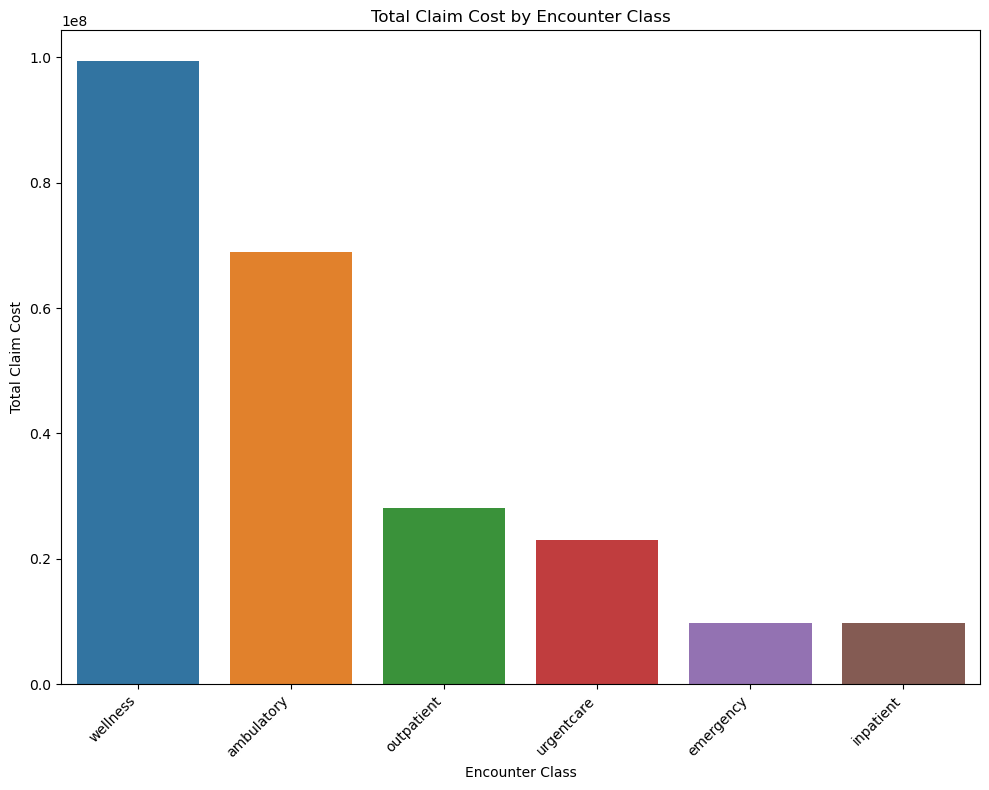

In [68]:
# Convert PySpark DataFrame to Pandas DataFrame for visualization
encounter_costs_pd = encounter_costs_sorted.toPandas()

# Plot the data using seaborn
plt.figure(figsize=(10, 8))
sns.barplot(x='ENCOUNTERCLASS', y='Total_Cost', data=encounter_costs_pd)
plt.xlabel('Encounter Class')
plt.ylabel('Total Claim Cost')
plt.title('Total Claim Cost by Encounter Class')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('Total claim cost by encounter.jpeg')
plt.show()

